**Лабораторная работа №7
Морфологический анализ изображений**

**Цель работы:** 
Освоение принципов математической морфологии в области обработки и анализа изображений.

In [67]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

1. Базовые морфологические операции. Выбрать произвольное изображение, содержащее дефекты формы (внутренние «дырки» или внешние «выступы») объектов. Используя базовые морфологические операции, полностью убрать или минимизировать дефекты.

In [109]:
grayI = cv2. imread ("bowling.jpg", cv2.IMREAD_GRAYSCALE )

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
closeI = cv2.morphologyEx(grayI, cv2.MORPH_CLOSE, kernel)
openI = cv2.morphologyEx(closeI, cv2.MORPH_OPEN, kernel)

(-0.5, 224.5, 240.5, -0.5)

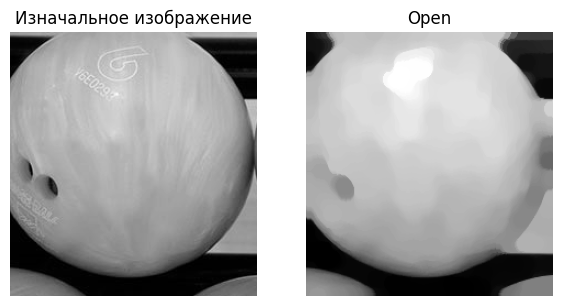

In [111]:
plt.figure(figsize=(7,5))
plt.subplot(1, 2, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(grayI, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Open')
plt.imshow(openI, cmap='gray')
plt.axis('off')

2. Разделение объектов. Выбрать произвольное бинарное изображение, содержащее перекрывающиеся объекты. Использовать операции бинарной морфологии для разделения объектов. Выделить контуры объектов.

In [157]:
# Разделение «склеенных» объектов 
I = cv2. imread ("apple.jpg", cv2.IMREAD_GRAYSCALE ) # превращаем картинку в полутоновую
ret , Inew = cv2. threshold (I, 190, 255, cv2.THRESH_BINARY_INV ) # бинаризация картинки
InewBinar = Inew
B = cv2. getStructuringElement (cv2.MORPH_ELLIPSE, (5, 5))
# Erosion
BW2 = cv2. morphologyEx (Inew ,cv2 . MORPH_ERODE , B, iterations = 14, 
                         borderType = cv2. BORDER_CONSTANT , borderValue = (0))
# Dilation
T = np. zeros_like ( Inew )
while cv2. countNonZero (BW2) < BW2. size :
    D = cv2.dilate (BW2 , B,
    borderType = cv2. BORDER_CONSTANT ,
    borderValue = (0))
    C = cv2.morphologyEx (D, cv2 . MORPH_CLOSE , B,
    borderType = cv2. BORDER_CONSTANT ,
    borderValue = (0))
    S = C - D
    T = cv2. bitwise_or (S, T)
    BW2 = D
# Closing for borders
T = cv2 . morphologyEx (T, cv2 . MORPH_CLOSE , B, iterations = 14, 
                        borderType = cv2. BORDER_CONSTANT, borderValue = (255))
# Remove borders from an image
Inew = cv2.bitwise_and (~T, Inew )

(-0.5, 1099.5, 501.5, -0.5)

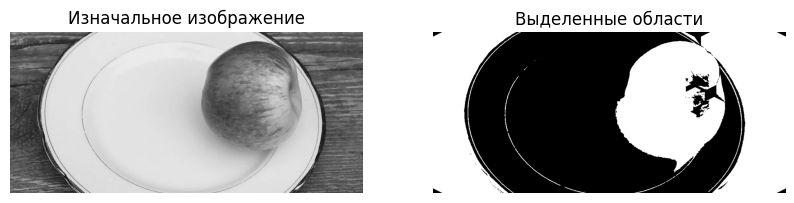

In [158]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(I, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Выделенные области')
plt.imshow(Inew, cmap='gray')
plt.axis('off')

3. Сегментация. Выбрать произвольное изображение, содержащее небольшое число локальных минимумов. Выполнить сегментацию изображения по водоразделам.

In [138]:
# We start with finding an approximate estimate of the coins. 
# For that, we can use the Otsu's binarization
img = cv2.imread("arduino2.jpg")
gray = cv2. imread ("arduino2.jpg", cv2.IMREAD_GRAYSCALE )
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.6*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

(-0.5, 499.5, 374.5, -0.5)

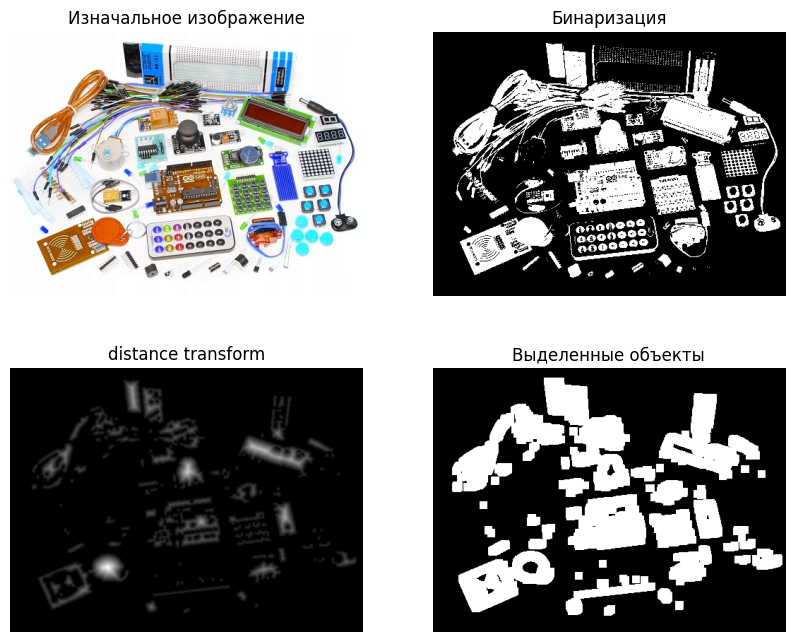

In [139]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Бинаризация')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('distance transform')
plt.imshow(dist_transform, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Выделенные объекты')
plt.imshow(unknown, cmap='gray')
plt.axis('off')